# Employee Churn Analysis

Employee churn analysis aims to predict who will leave the company. Churn analysis is very cruicial because retention is more important than aquisistion. Based on research there are manay factors related to employee churn i.e: Age, Gender, Pay, Job Satisfaction, Salary, Work environment,Growth and Fairness within the organization, other variables are also factors such as Gender, Work hours, number of projects at any given time, number of years spend in the company and department.

Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [3]:
df = pd.read_csv(r'C:/Users/PC/Desktop/Churn Analysis/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In the dataset there a total of 1499 employees record with 10 features which shows the information corresponding to each employee. The "left" column indicates the employee status showing that the employee stayed at the company or leave the company. In this column, 0 indicates that the employee still working at the company, and 1 indicates that the employee leaves the company. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Checking missing values

There are not null or missing values in the data

In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The information displayed above indicates that each employe has worked on atleast two projects and maximum 7 projects, all employee worked for atleast 2 years for the organization and for maximum 10 years

## Data Preprocessing 

## Data Visualisation - Histograms
Checking how our data is distributed to encounter any outliers which needs to be removed

#### Distribution of the class variable "left"

In [9]:
churn  =df.groupby('left')
churn.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


There are 11428 (66%) employees who did not churn and  3571 (44%) who did churn in this dataset.

In [10]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
print (df.shape)

(14999, 10)


## Histogram

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

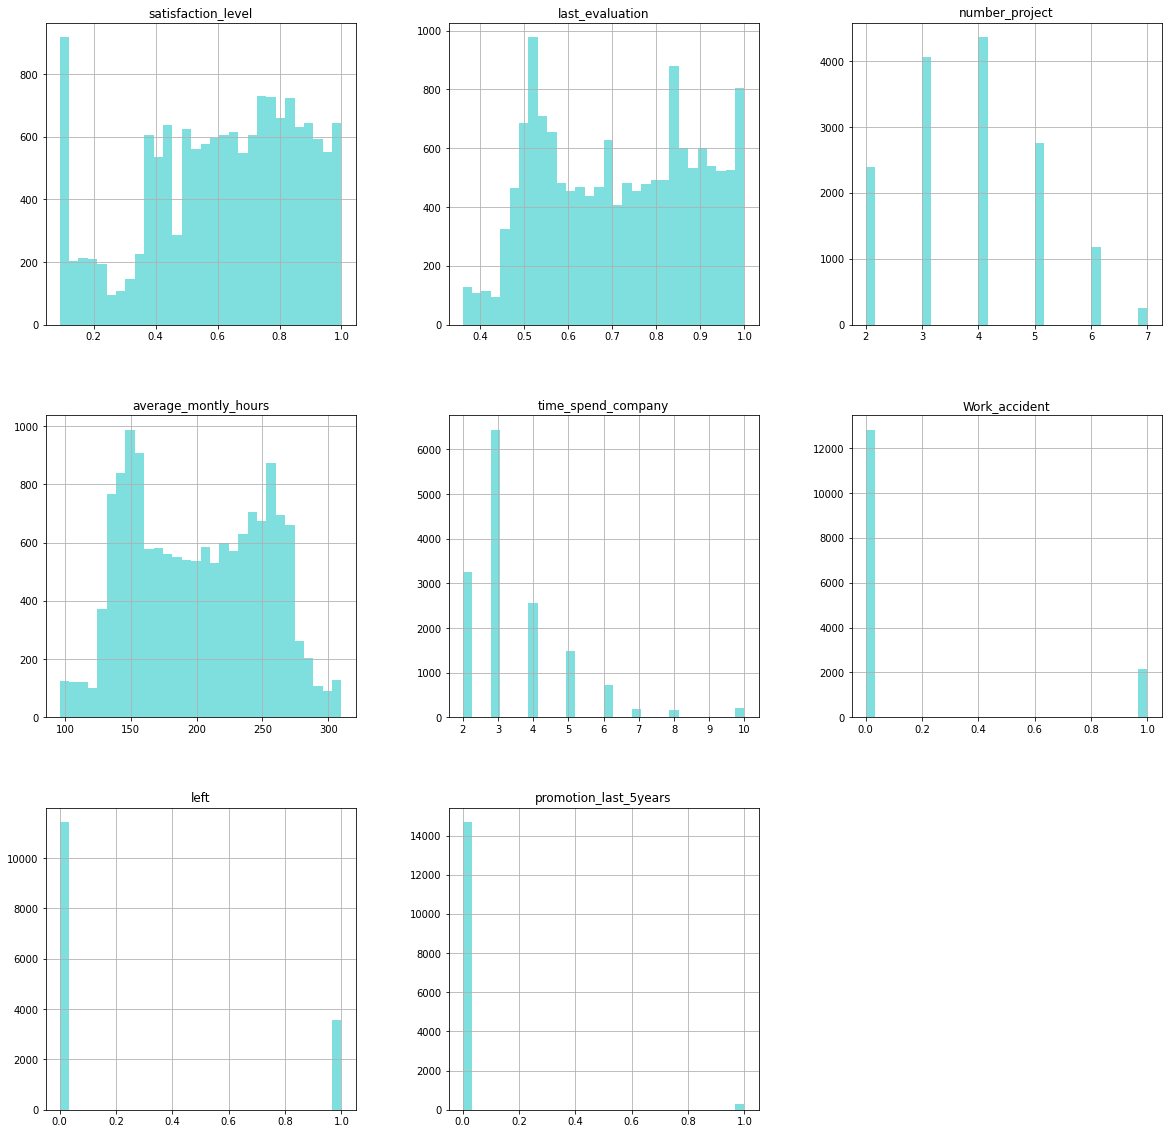

In [12]:
df.hist(bins=30, figsize=(20,20), color= 'c', alpha= 0.5)

<AxesSubplot:>

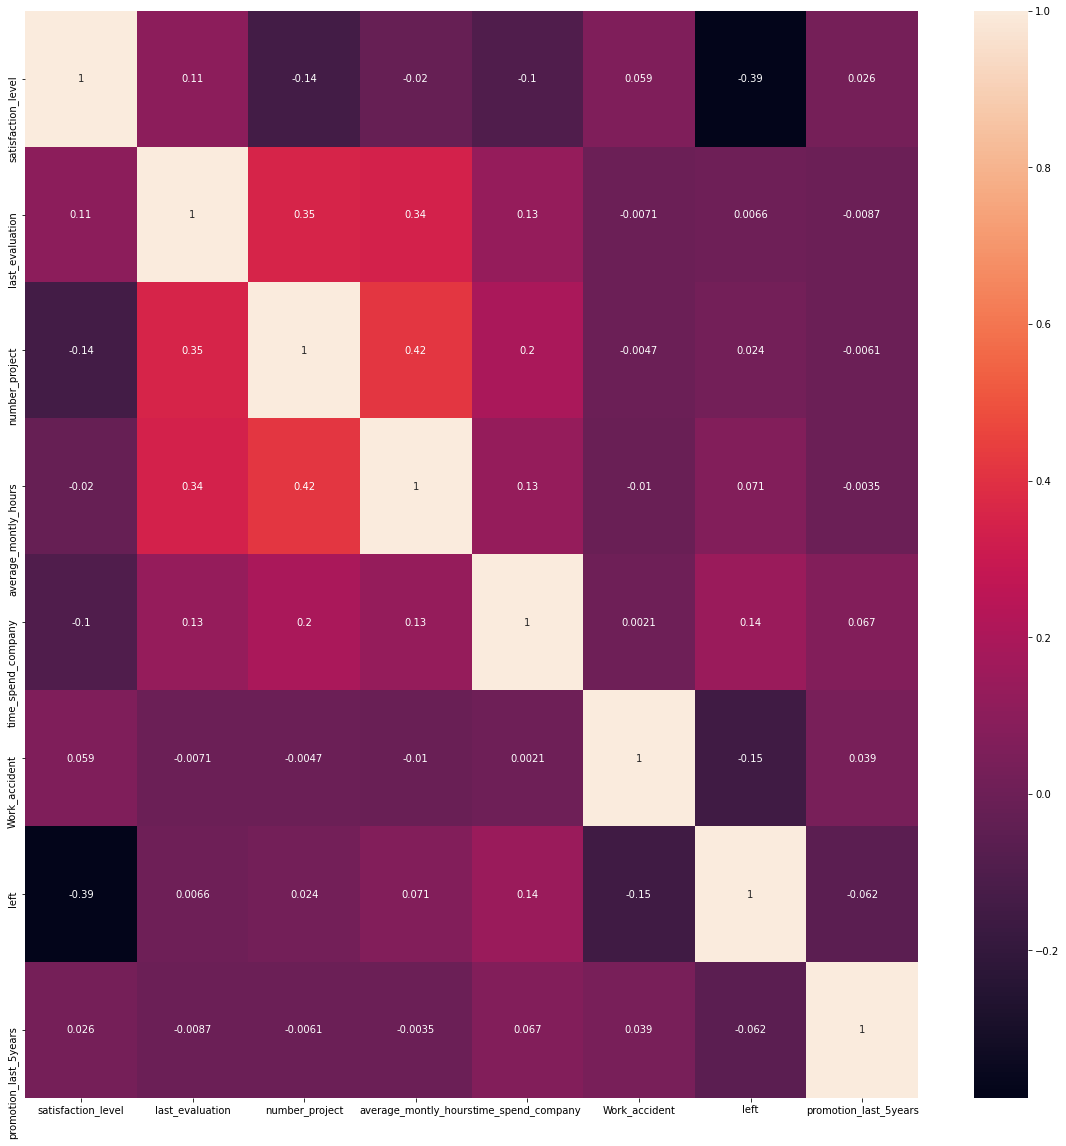

In [13]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

The above computed correlation visualization indicated that our variables are not highly correlated. The "average_monthly_hours" is correlated to " number_project" which makes sense because the more number of project an employee is working on the more hours are consumed on average monthly basis.

### Preprocessing the Data

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Converting string variables into numeric variable.
df['salary']=le.fit_transform(df['salary'])
df['Departments']=le.fit_transform(df['Departments'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  int32  
 9   salary                 14999 non-null  int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


# Cluster Analysis

In [50]:
from sklearn.cluster import KMeans
# Filter data
filt =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(filt)

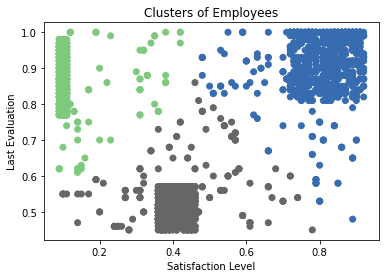

In [52]:
filt['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(filt['satisfaction_level'], filt['last_evaluation'], c=filt['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of Employees')
plt.show()

### Prediction Model (Gradient Boosting Classifier)

In [37]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary']]
y=df['left']
#Split the dataset into training 80% and testing 20% 


#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 



In [45]:
from sklearn.ensemble import GradientBoostingClassifier


#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



### Conclusion
Accuracy: The Churn Analysis model has an accuracy has of 97% considered as effective accuracy.
Precision: The model precision is 96% accuracte meaning it predicts the churn precisely accurate.
Recall: The model recall rate is 92%, meaning the rate by which our model predicted True positives correctly